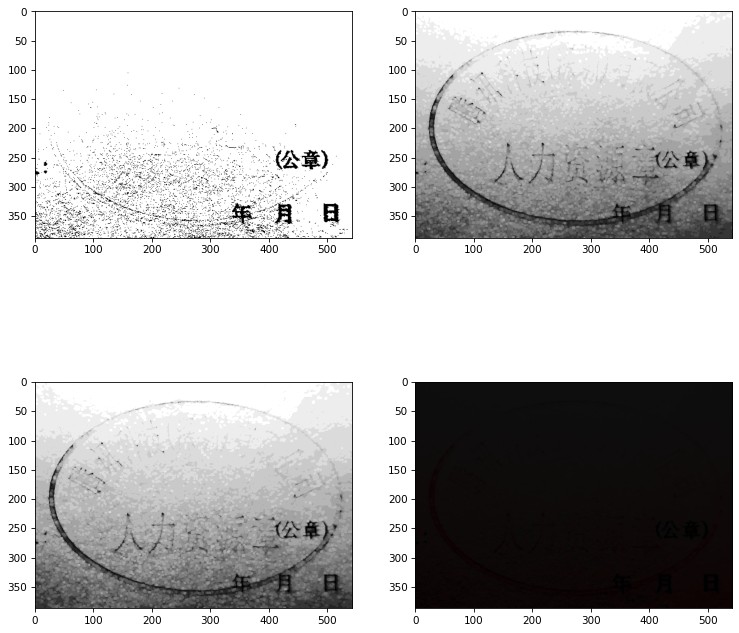

In [269]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)

img = cv2.imread('C:\\Users\\XRUI\\Desktop\\sidong.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img3R, img3G, img3B = cv2.split(img)

def filsR(obj):
    for i in range(len(obj)):
        for j in range(len(obj[0])):
            if obj[i][j] > 150 and obj[i][j] < 255:
                obj[i][j] = 255
            else:
                obj[i][j] = 0
    return obj

def filsGB(obj):
    for i in range(len(obj)):
        for j in range(len(obj[0])):
            if obj[i][j] > 160 or obj[i][j] < 100:
                obj[i][j] = 255
            else:
                obj[i][j] = 0
    return obj


img3R = filsR(img3R)
img3G = filsGB(img3G)
img3B = filsGB(img3B)


img3R = cv2.medianBlur(img3R, 3)
img3G = cv2.medianBlur(img3G, 3)
img3B = cv2.medianBlur(img3B, 3)

kernel = np.ones((3, 3), np.uint8)
FTYPE = cv2.BORDER_ISOLATED
img3R = cv2.dilate(img3R, kernel, borderType = FTYPE)
img3G = cv2.dilate(img3G, kernel, borderType = FTYPE)
img3B = cv2.dilate(img3B, kernel, borderType = FTYPE)






img3R = cv2.equalizeHist(img3R)
img3G = cv2.equalizeHist(img3G)
img3B = cv2.equalizeHist(img3B)


# # #进行Log, Power变换
img3R = np.round(np.power(img3R, 0.48)).astype('uint8')
img3G = np.round(np.power(img3G, 0.48)).astype('uint8')
img3B = np.round(np.power(img3B, 0.48)).astype('uint8')


def fil2(obj):
    for i in range(len(obj)):
        for j in range(len(obj[0])):
            if obj[i][j] >= 6:
                obj[i][j] = 255
            else:
                obj[i][j] = 0
    return obj
# img3G = fil2(img3G)
# print(img3G)

cur = cv2.merge((img3R, img3G, img3B))

plt.figure(figsize = (12, 12), dpi = 75)
plt.subplot(221)
plt.imshow(img3R, 'gray')
plt.subplot(222)
plt.imshow(img3G, 'gray')
plt.subplot(223)
plt.imshow(img3B, 'gray')
plt.subplot(224)
plt.imshow(cur)
plt.show()
#绘图部分
# plt.figure(figsize = (12,8), dpi = 75)
# plt.subplot(231)
# plt.title("Origin")
# plt.imshow(img3, 'gray')
# plt.subplot(232)
# plt.imshow(img3_log, 'gray')
# plt.title("Log")
# plt.subplot(233)
# plt.imshow(img3_pow, 'gray')
# plt.title("Pow")
# plt.subplot(234)
# plt.hist(img3.flatten(), bins = 255, color = 'b')
# plt.subplot(235)
# plt.hist(img3_log.flatten(), bins = 255, color = 'b')
# plt.subplot(236)
# plt.hist(img3_pow.flatten(), bins = 255, color = 'b')
# plt.show()